# Assignment 3 - Task 1

### Develop a tutorial ipython note that explains 'Complementary Slackness' condition using 2D data example. (25)

Agenda:
1. Introduction to Complementary Slackness
2. Creating a 2D Dataset
3. Application of Complementary Slackness
4. Results and Visuals
5. Conclusion and Takeaways

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
np.random.seed(0)


### 1. Introduction to Complementary Slackness

We will define complementary slackness as a condition in optimization theory where when given an optimal solution, each constract that exists is either active or its assiciated dual-variable is zero. When discussing optimization problems, the concept of complementry slackness is important in understanding optimal solutions and the means by which constraints interact with them.

The idea here is that if we have a primal problem with a set of contraints and its dual problem, the complementary slackness condition states the following two items: (1) each inequality contraint, within the primal, if that contraint is not active in the sense that there surplus in the constract, the the corresponding dual variable must be zero. It is important to remember that that is known as the Lagrange multiplier. (2) alternatively if a dual variable is not zero, then the corresponding primal constract is active. This is in the sense that it holds as an equality.

### 2. Creating a 2D Dataset:

Now that we have a much better understanding of the Complementary Slackness condition, let us go ahead and prepare a dataset to better understand the concept. Le tus create a fake 2D dataset with two classes. For simpilicity in this tutorial, let us consider each class having 20 data points with different mean values:

In [47]:
# fake data set
class_a = np.random.multivariate_normal([2, 2], [[0.5, 0], [0, 0.5]], 20)
class_b = np.random.multivariate_normal([-2, -2], [[0.5, 0], [0, 0.5]], 20)

# fake data X and y. X is the coordiates, y is the label
X = np.vstack((class_a, class_b))
y = np.hstack((np.ones(20), -np.ones(20)))


print(X)

[[ 3.24737338  2.28295388]
 [ 2.69207227  3.58455078]
 [ 3.32056292  1.30896018]
 [ 2.67181396  1.89297429]
 [ 1.92701325  2.29033699]
 [ 2.10185419  3.02832666]
 [ 2.53813494  2.08603723]
 [ 2.3138587   2.23594338]
 [ 3.05647344  1.8549312 ]
 [ 2.22137229  1.39606311]
 [ 0.19476359  2.46217814]
 [ 2.6112487   1.47521008]
 [ 3.60495889  0.97160817]
 [ 2.03235616  1.86764103]
 [ 3.08383858  3.03899355]
 [ 2.10956438  2.26740128]
 [ 1.37224068  0.59936539]
 [ 1.75398896  2.11055542]
 [ 2.86994688  2.85021094]
 [ 1.72611858  1.78623968]
 [-2.74143891 -3.00410431]
 [-3.20651522 -0.62059349]
 [-2.36037851 -2.30976531]
 [-2.88586009 -1.4502313 ]
 [-3.14119811 -2.15043009]
 [-2.63319048 -1.72641862]
 [-2.36119378 -2.83483302]
 [-2.01992784 -1.69712363]
 [-1.95296522 -1.78612007]
 [-2.44853345 -2.25649674]
 [-2.47550134 -2.25424248]
 [-2.57498125 -3.22066613]
 [-1.87454077 -2.28410202]
 [-3.15272431 -1.67276353]
 [-2.64155683 -1.96326906]
 [-1.48445512 -1.90879531]
 [-1.19432205 -2.87315371]
 

In [48]:
print(y)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]


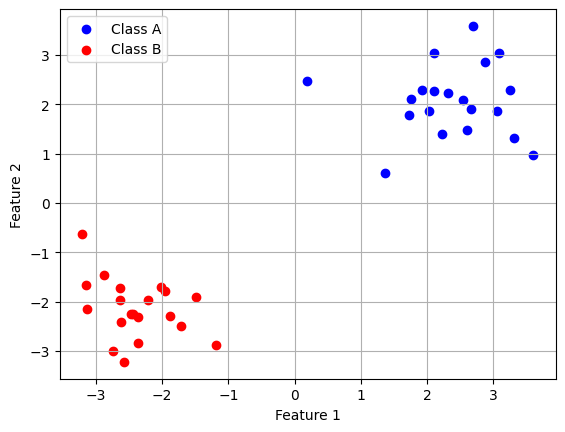

In [49]:
# plot data
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label="Class A")
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label="Class B")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

Looking above, we see that the results of our code created a graph of the data, with class A in purple on the upper right hand side, and class B in read on the bottom left. This lets use visualize a simple linear boundary between the two that separates these two classes, making it easier to understand the complementary slackness problem.

Now, let’s set up and solve a simple optimization problem that will allow us to apply the Complementary Slackness condition.

### 3. Application of Complementary Slackness:

Let us now apply a linear SVM formulation to find weights and bias so that the margin is maximized between the two classes.

We will denote the weights as "w" and the bias as "b", and so we can think of our optimization problem as minimize 1/2||w||^2

This is subject to y_i(w * x_i + b) >= 1, for all i

In this problem above the complementary slacknes helps determine which contraints are active. Note that the constraints here are the data points. The idea is to know which ones lie exactly on the margin. These active contraints are the support vectors in this implementation. 

If a data point is not on the margin boundary then its constraint is inactive. Therefore its dual variable is zero.

To apply complementary slackness, we need to (1) solve optimization problem to find the optimal weight (w) and bias (b), and then (2) Identify support vectors where y_i(w * x_i + b) holds exactly as that



In [50]:
# train a linear SVM form sklearn packagae
# note that I am setting C to a high value for a hard margin
svc = SVC(kernel='linear', C=1e6)
svc.fit(X, y)

SVC(C=1000000.0, kernel='linear')

In [51]:
# weights and bias
weights = svc.coef_.flatten()
bias = svc.intercept_[0]

print("weights: ", weights)
print("bias: ", bias)

weights:  [0.39534717 0.34711229]
bias:  0.24944143532542762


In [52]:
# decision boundary and support vectors
x_vals = np.linspace(-4, 4, 100)
y_vals = -(weights[0] * x_vals + bias) / weights[1]

print("x_vals: ", x_vals[:10])
print("y_vals:", y_vals[:10])

x_vals:  [-4.         -3.91919192 -3.83838384 -3.75757576 -3.67676768 -3.5959596
 -3.51515152 -3.43434343 -3.35353535 -3.27272727]
y_vals: [3.83722289 3.74518568 3.65314848 3.56111127 3.46907406 3.37703686
 3.28499965 3.19296244 3.10092524 3.00888803]


### 4. Results and Visuals:

After solving the SVM optimization above, we now have the weights and bias, we now know the support vectors and know the lineary boundary between them.

Using the visualization below, we can now see the dataset with the two classes, the decision boundary or hyperplane, and the margin around that hyperplane with the highlighted support vectors.



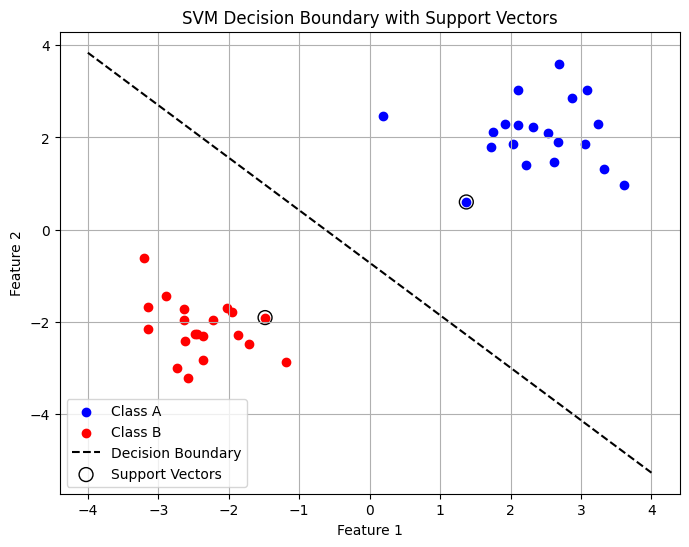

In [53]:
# plot the fig
plt.figure(figsize=(8, 6))

# plot class a
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label="Class A")

# plot class b
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label="Class B")

# plot boundary
plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")

# outline the support vectors
support_vectors = svc.support_vectors_
plt.scatter(support_vectors[:, 0], 
            support_vectors[:, 1], 
            s=100,
            facecolors='none', 
            edgecolor='k', 
            label="Support Vectors")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("SVM Decision Boundary with Support Vectors")
plt.grid(True)
plt.show()




The visual above shows which data points satisfy the complementary slackness condition (margin), which are the support vectors which satisfy 
This visualization emphasizes which data points satisfy the complementary slackness condition by lying on the margin boundary. Only the support vectors satisfy y_i(w * x_i + b) >= 1 whereas other points are outside of the margin.

### 5. Conclusions:


* THis tutorial showcases the concept of the complementary slackness condition through a live example
* The example we used was a 2D dataset consisting of two classes.
* We used a support vector machine to find the weights and bias to optimize the boundary between them.
* Complementary slackness serves as a diagnostic means to show which constraints impact the solution at hand
* For our linear SVM, the support vectors were identified as the data points that lie on our respective margin boundary, satisfying complementary slackness.
* Complementary slackness helps us simplify and interpret optimization problems by isolating critical points that define the decision boundary